In [ ]:
pip install bioimageio.core

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.3/77.3 kB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.8/142.8 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.4/49.4 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 485.6/485.6 kB 7.7 MB/s eta 0:00:00


In [ ]:
import os
import hashlib

import bioimageio.core
import imageio

# we use napari for visualising images, you can install it via `pip install napari` or`conda install napari`
import numpy as np
import xarray as xr

site.config.json: 6.29kiB [00:00, 4.21MiB/s]                  
/usr/local/lib/python3.10/dist-packages/bioimageio/spec/shared/_resolve_source.py:471: UserWarning: Download (6288) does not have expected size (2164).
  warnings.warn(f"Download ({t.n}) does not have expected size ({total_size}).")
collection.json: 198kiB [00:00, 19.0MiB/s]                   
/usr/local/lib/python3.10/dist-packages/bioimageio/spec/shared/_resolve_source.py:471: UserWarning: Download (198020) does not have expected size (25639).
  warnings.warn(f"Download ({t.n}) does not have expected size ({total_size}).")


**Reverify the Zendo id in both Zendo and Bioimage.io. They could be different. Finally only use the one in Zendo. Also, use the Ilastik format for download, upload the zip folder in Colab and run**

In [ ]:
# the model can be loaded using different representations:

# the doi of the zenodo entry corresponding to the model
# rdf_doi = "10.5281/zenodo.6287342"
rdf_doi = "10.5281/zenodo.7768142"

# the one that I am probably gonna use - https://zenodo.org/record/7768142/files/rdf.yaml?download=1
# the url of the yaml file containing the model resource description
# rdf_url = "https://zenodo.org/record/6287342/files/rdf.yaml"
rdf_url = "https://zenodo.org/record/7768142/files/rdf.yaml"

# filepath to the downloaded model (either zipped package or yaml)
# to download it from the website:
# - go to https://bioimage.io/#/?id=10.5281%2Fzenodo.5764892%2F5764893
# - click the download icon
# - select "ilastik" weight format
rdf_path = "/content/plant_seg_Bioimage_model_zoo.zip"

In [ ]:
# load model from link to rdf.yaml
model_resource = bioimageio.core.load_resource_description(rdf_url)


rdf.yaml: 100%|██████████| 2.44k/2.44k [00:00<00:00, 1.53MiB/s]

raw.png:   0%|          | 0.00/151k [00:00<?, ?iB/s]
raw.png:  22%|██▏       | 32.8k/151k [00:00<00:00, 289kiB/s]
raw.png:  54%|█████▍    | 81.9k/151k [00:00<00:00, 362kiB/s]
raw.png: 100%|██████████| 151k/151k [00:00<00:00, 422kiB/s]

pred.png:   0%|          | 0.00/67.9k [00:00<?, ?iB/s]
pred.png: 100%|██████████| 67.9k/67.9k [00:00<00:00, 582kiB/s]

unet3d.md: 100%|██████████| 173/173 [00:00<00:00, 306kiB/s]

sample_input_0.tif:   0%|          | 0.00/6.57M [00:00<?, ?iB/s]
sample_input_0.tif:   0%|          | 32.8k/6.57M [00:00<00:22, 292kiB/s]
sample_input_0.tif:   1%|          | 81.9k/6.57M [00:00<00:17, 363kiB/s]
sample_input_0.tif:   2%|▏         | 131k/6.57M [00:00<00:16, 385kiB/s] 
sample_input_0.tif:   3%|▎         | 197k/6.57M [00:00<00:14, 449kiB/s]
sample_input_0.tif:   4%|▎         | 246k/6.57M [00:00<00:14, 435kiB/s]
sample_input_0.tif:   5%|▍         | 311k/6.57M [00:00<00:13, 473kiB/s]
sample_input_0.tif

In [ ]:
# load model from doi
model_resource = bioimageio.core.load_resource_description(rdf_doi)


rdf.yaml: 100%|██████████| 2.44k/2.44k [00:00<00:00, 2.05MiB/s]

raw.png:   0%|          | 0.00/151k [00:00<?, ?iB/s]
raw.png:  22%|██▏       | 32.8k/151k [00:00<00:00, 290kiB/s]
raw.png: 100%|██████████| 151k/151k [00:00<00:00, 610kiB/s] 

pred.png:   0%|          | 0.00/67.9k [00:00<?, ?iB/s]
pred.png: 100%|██████████| 67.9k/67.9k [00:00<00:00, 572kiB/s]

unet3d.md: 100%|██████████| 173/173 [00:00<00:00, 69.9kiB/s]

sample_input_0.tif:   0%|          | 0.00/6.57M [00:00<?, ?iB/s]
sample_input_0.tif:   0%|          | 32.8k/6.57M [00:00<00:21, 308kiB/s]
sample_input_0.tif:   1%|          | 81.9k/6.57M [00:00<00:17, 370kiB/s]
sample_input_0.tif:   2%|▏         | 147k/6.57M [00:00<00:14, 452kiB/s] 
sample_input_0.tif:   3%|▎         | 229k/6.57M [00:00<00:11, 543kiB/s]
sample_input_0.tif:   4%|▍         | 295k/6.57M [00:00<00:11, 544kiB/s]
sample_input_0.tif:   5%|▌         | 360k/6.57M [00:00<00:11, 537kiB/s]
sample_input_0.tif:   6%|▋         | 426k/6.57M [00:00<00:11, 539kiB/s]
sampl

In [ ]:
# load model from path to the zipped model files
model_resource = bioimageio.core.load_resource_description(rdf_path)

/usr/local/lib/python3.10/dist-packages/bioimageio/spec/shared/_resolve_source.py:437: CacheWarning: found cached /tmp/root/bioimageio_cache/https/zenodo.org/api/files/f0c392e2-4c33-43ec-9a79-57d89a8ffff1/unet3d.md. Skipping download of https://zenodo.org/api/files/f0c392e2-4c33-43ec-9a79-57d89a8ffff1/unet3d.md.
  warnings.warn(f"found cached {local_path}. Skipping download of {uri}.", category=CacheWarning)
/usr/local/lib/python3.10/dist-packages/bioimageio/spec/shared/_resolve_source.py:437: CacheWarning: found cached /tmp/root/bioimageio_cache/https/zenodo.org/api/files/f0c392e2-4c33-43ec-9a79-57d89a8ffff1/unet.py. Skipping download of https://zenodo.org/api/files/f0c392e2-4c33-43ec-9a79-57d89a8ffff1/unet.py.
  warnings.warn(f"found cached {local_path}. Skipping download of {uri}.", category=CacheWarning)


In [ ]:
# the "model_resource" instance returned by load_resource_description
# contains the information stored in the resource description (see https://github.com/bioimage-io/spec-bioimage-io/blob/gh-pages/model_spec_latest.md)

# we can e.g. check what weight formats are available in the model (pytorch_state_dict for the model used here)
print("Available weight formats for this model:", model_resource.weights.keys())
# or where the (downloaded) weight files are stored
print("Pytorch state dict weights are stored at:", model_resource.weights["pytorch_state_dict"].source)
print()
# or what inputs the model expects
print("The model requires as inputs:")
for inp in model_resource.inputs:
    print("Input with axes:", inp.axes, "and shape", inp.shape)
print()
# and what the model outputs are
print("The model returns the following outputs:")
for out in model_resource.outputs:
    print("Output with axes:", out.axes, "and shape", out.shape)

Available weight formats for this model: dict_keys(['pytorch_state_dict'])
Pytorch state dict weights are stored at: /tmp/root/bioimageio_cache/extracted_packages/33fd1315f542977fe0e4971ed8ace93c9ee523b8db0a493f575d7ff8871601eb/confocal_pnas_3d.pytorch

The model requires as inputs:
Input with axes: ('b', 'c', 'z', 'y', 'x') and shape [1, 1, 100, 128, 128]

The model returns the following outputs:
Output with axes: ('b', 'c', 'z', 'y', 'x') and shape ImplicitOutputShape(reference_tensor='raw', scale=[1.0, 1.0, 1.0, 1.0, 1.0], offset=[0.0, 0.0, 0.0, 0.0, 0.0])


In [ ]:
# the function 'test_model' from 'bioimageio.core.resource_tests' can be used to fully test the model,
# including running prediction for the test input(s) and checking that they agree with the test output(s)
# before using a model, it is recommended to check that it properly works with this function
# 'test_model' returns a dict with 'status'='passed'/'failed' and more detailed information
from bioimageio.core.resource_tests import test_model

# Assuming you have already loaded the model and created the `model_resource` instance

# Run the test_model function on the model_resource
test_results = test_model(model_resource)

# Check the status of each test in the test_results list
for test_result in test_results:
    if test_result["status"] == "failed":
        # If the test failed, print the details of the failure
        print("model test:", test_result["name"])
        print("The model test failed with:", test_result["error"])
        print("with the traceback:")
        print("".join(test_result["traceback"]))
    else:
        # If the test passed, print a success message
        print("The model passed all tests")


weights-torchscript.pt:  56%|█████▋    | 65.4M/116M [13:58<10:48, 77.9kiB/s]

The model passed all tests
The model passed all tests
The model passed all tests
The model passed all tests
The model passed all tests


In [ ]:
from skimage import io

In [ ]:
input_image_110_png = io.imread('/content/drive/MyDrive/BioimageIO_Inputs/110_110_Membrane_analysis.png')
input_image_110_tif = io.imread('/content/drive/MyDrive/BioimageIO_Inputs/110_110_Membrane_analysis.tif')
input_image_128_png = io.imread('/content/drive/MyDrive/BioimageIO_Inputs/128_128_Membrane_analysis.png')
input_image_128_tif = io.imread('/content/drive/MyDrive/BioimageIO_Inputs/128_128_Membrane_analysis.tif')
input_image_135_png = io.imread('/content/drive/MyDrive/BioimageIO_Inputs/135_135_Membrane_analysis.png')
input_image_135_tif = io.imread('/content/drive/MyDrive/BioimageIO_Inputs/135_135_Membrane_analysis.tif')
input_image_512_png = io.imread('/content/drive/MyDrive/BioimageIO_Inputs/512_512_Membrane_analysis.png')
input_image_512_tif = io.imread('/content/drive/MyDrive/BioimageIO_Inputs/512_512_Membrane_analysis.tif')


In [ ]:
input_list = (input_image_110_png,
           input_image_110_tif,
input_image_128_png,
input_image_128_tif,
input_image_135_png,
input_image_135_tif,
input_image_512_png,
input_image_512_tif)

In [ ]:
input_list_reshaped = []

In [ ]:
for i in range(len(input_list)-1) :
  reshaped_img = input_list[i].reshape((1,1,1,*input_list[i].shape))
  input_list_reshaped.append(reshaped_img)

In [ ]:
input_list_reshaped[2]

array([[[[[15, 15, 13, ...,  4,  3,  2],
          [16, 13, 13, ...,  2, 11,  9],
          [17, 16, 21, ..., 10,  6, 14],
          ...,
          [ 4, 11,  8, ...,  5,  7, 11],
          [20,  9,  5, ..., 11, 20, 12],
          [19, 15,  6, ..., 12,  8, 19]]]]], dtype=uint8)

In [ ]:
# Next, create a 'prediction_pipeline'. The prediction_pipeline is used to run prediction with a given model.
# This means it applies the preprocessing, runs inference with the model and applies the postprocessing.

# The 'devices' argument can be used to specify which device(s) to use for inference with the model.
# Hence it can be used to specify whether to use the cpu, a single gpu or multiple gpus (not implemented yet).
# By default (devices=None) a gpu will be used if available and otherwise the cpu will be used.
devices = None

# The 'weight_format' argument can be used to specify which weight format available in the model to use.
# By default (weight_format=None) the weight format with highest priority (as defined by bioimageio.core) will be used.
weight_format = None

prediction_pipeline = bioimageio.core.create_prediction_pipeline(
    model_resource, devices=devices, weight_format=weight_format
)

**The actual function ie prediction = prediction_pipeline(input_array)[0] is not working for some reason. Instead use the bioimageio.core.predict_with_padding function**

In [ ]:
prediction = bioimageio.core.predict_with_padding(prediction_pipeline, input_list_reshaped[2])


In [ ]:
type(prediction)

list

In [ ]:
len(prediction)

1

In [ ]:
print(prediction[0].shape)

(1, 1, 1, 128, 128)


In [ ]:
out_image = prediction[0]

In [ ]:
print(out_image.shape)

(1, 1, 1, 128, 128)


In [ ]:
import matplotlib as plt

In [ ]:
pip install pyclesperanto-prototype


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 617.9/617.9 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 919.2/919.2 kB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 13.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.6/70.6 kB 7.9 MB/s eta 0:00:00
  Created wheel for transforms3d: filename=transforms3d-0.4.1-py3-none-any.whl size=1376757 sha256=7e6caabfad748fd57917bdd79e23fd7d3f7b7a1bc22c70e416518aaf6d721c23
  Stored in directory: /root/.cache/pip/wheels/06/37/d0/6e0fe02010be074e8138f2b5ffff5254b74751aafb60bb5666
Successfully built transforms3d


In [ ]:
import pyclesperanto_prototype as cle


In [ ]:
import matplotlib.pyplot as plt


Worked only when png input shape of size 128*128(shape definitions of the model) were used. Not yet tested with other inputs

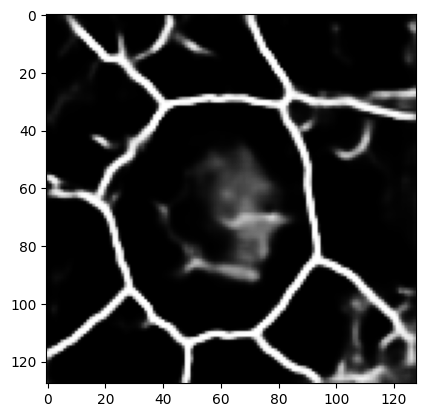

In [ ]:
plt.imshow(out_image[0, 0, 0, :, :], cmap = 'gray')